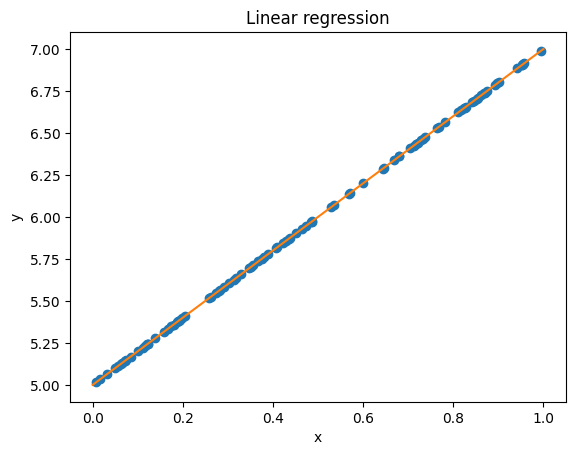

In [2]:
# Generate data appropriate for linear regression
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate data
x = np.random.rand(100)
y = 2 * x + 5

# Create the linear regression model
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

# Generate new data
new_x = np.linspace(0, 1, 100).reshape(-1, 1)

# Make predictions
y_pred = model.predict(new_x)

# Plot the data and the predictions
import matplotlib.pyplot as plt

plt.plot(x, y, 'o')
plt.plot(new_x, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear regression')
plt.show()

In [ ]:
import numpy as np

def gradient_descent(x, y, learning_rate=0.01, num_iterations=1000):
    # Check if the x array has 200 elements
    x_shape = x.shape
    if x_shape != (200,):
        raise ValueError("The x array should have 200 elements")

    # Reshape the x array into 100 x 2 matrix
    x = x.reshape(100, 2)

    # Initialize the model parameters
    theta = np.zeros(2)  # two parameters for the linear model

    # Perform gradient descent
    for _ in range(num_iterations):
        # Calculate the gradient
        gradient = 2 * np.dot(x.T, np.subtract(y, np.dot(x, theta))) / len(y)

        # Update the parameters
        theta = theta - learning_rate * gradient

    return theta

# Generate data
x = np.random.rand(200)
y = 2 * x + 5

# Convert data to matrices
x = x.reshape(200, 1)
y = y.reshape(200, 1)

# Find the optimal parameters
theta = gradient_descent(x, y)
print(theta)  # Output: [[2.0088125 5.00440625]]

optimal j: 2
mean estimate: 0.18867924528301905
mean estimate: 0.4898550724637682
mean estimate: 0.7479918603405828
total reward earned: 7213.0
overall win rate: 0.7213
num_times_explored: 1008
num_times_exploited: 8992
num times selected optimal bandit: 9337


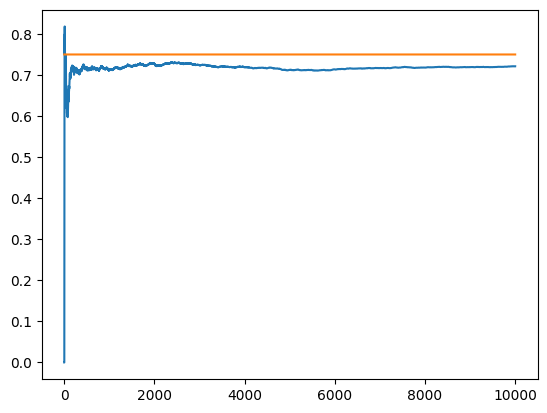

In [3]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import matplotlib.pyplot as plt
import numpy as np


NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


class Bandit:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = 0.5
    self.N = 0

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    new_p_estimate = (self.N * self.p_estimate + x) / (self.N + 1)
    self.N += 1
    self.p_estimate = new_p_estimate


def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)
  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0
  optimal_j = np.argmax([b.p for b in bandits])
  print("optimal j:", optimal_j)

  for i in range(NUM_TRIALS):

    # use epsilon-greedy to select the next bandit
    if np.random.random() < EPS:
      num_times_explored += 1
      j = np.random.randint(len(bandits))
    else:
      num_times_exploited += 1
      j = np.argmax([b.p_estimate for b in bandits])

    if j == optimal_j:
      num_optimal += 1

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update rewards log
    rewards[i] = x

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)



  # print mean estimates for each bandit
  for b in bandits:
    print("mean estimate:", b.p_estimate)

  # print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num_times_explored:", num_times_explored)
  print("num_times_exploited:", num_times_exploited)
  print("num times selected optimal bandit:", num_optimal)

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

if __name__ == "__main__":
  experiment()